<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [20]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [21]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


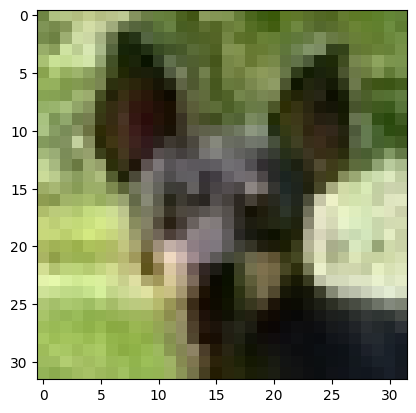

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
idx = 2500
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 256)       

In [24]:
# x: 0~1
# y: 配合loss這邊做Sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [25]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 7s 12ms/step - loss: 1.6022 - accuracy: 0.4113 - val_loss: 1.2554 - val_accuracy: 0.5402
Epoch 2/40
450/450 [==============================] - 5s 11ms/step - loss: 1.1440 - accuracy: 0.5912 - val_loss: 1.0437 - val_accuracy: 0.6368
Epoch 3/40
450/450 [==============================] - 5s 11ms/step - loss: 0.9292 - accuracy: 0.6700 - val_loss: 0.8407 - val_accuracy: 0.7096
Epoch 4/40
450/450 [==============================] - 5s 11ms/step - loss: 0.7877 - accuracy: 0.7226 - val_loss: 0.8120 - val_accuracy: 0.7226
Epoch 5/40
450/450 [==============================] - 5s 11ms/step - loss: 0.6789 - accuracy: 0.7635 - val_loss: 0.7002 - val_accuracy: 0.7596
Epoch 6/40
450/450 [==============================] - 5s 11ms/step - loss: 0.5889 - accuracy: 0.7954 - val_loss: 0.7001 - val_accuracy: 0.7664
Epoch 7/40
450/450 [==============================] - 5s 11ms/step - loss: 0.5146 - accuracy: 0.8176 - val_loss: 0.7705 - val_accuracy: 0.7428

In [27]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7072 - accuracy: 0.7661


[0.7072106599807739, 0.7660999894142151]

In [28]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),800,14,76,9,27,1,5,11,35,22
automobile(true),13,877,7,5,2,3,3,2,15,73
bird(true),57,4,713,47,71,25,43,27,6,7
cat(true),33,11,88,553,88,107,45,50,12,13
deer(true),17,2,66,31,778,23,27,50,5,1
dog(true),18,4,60,151,62,592,19,72,12,10
frog(true),9,5,44,46,41,14,815,12,8,6
horse(true),17,1,29,25,67,25,5,821,4,6
ship(true),50,18,18,5,12,4,5,4,854,30
truck(true),26,61,14,4,3,3,4,10,17,858


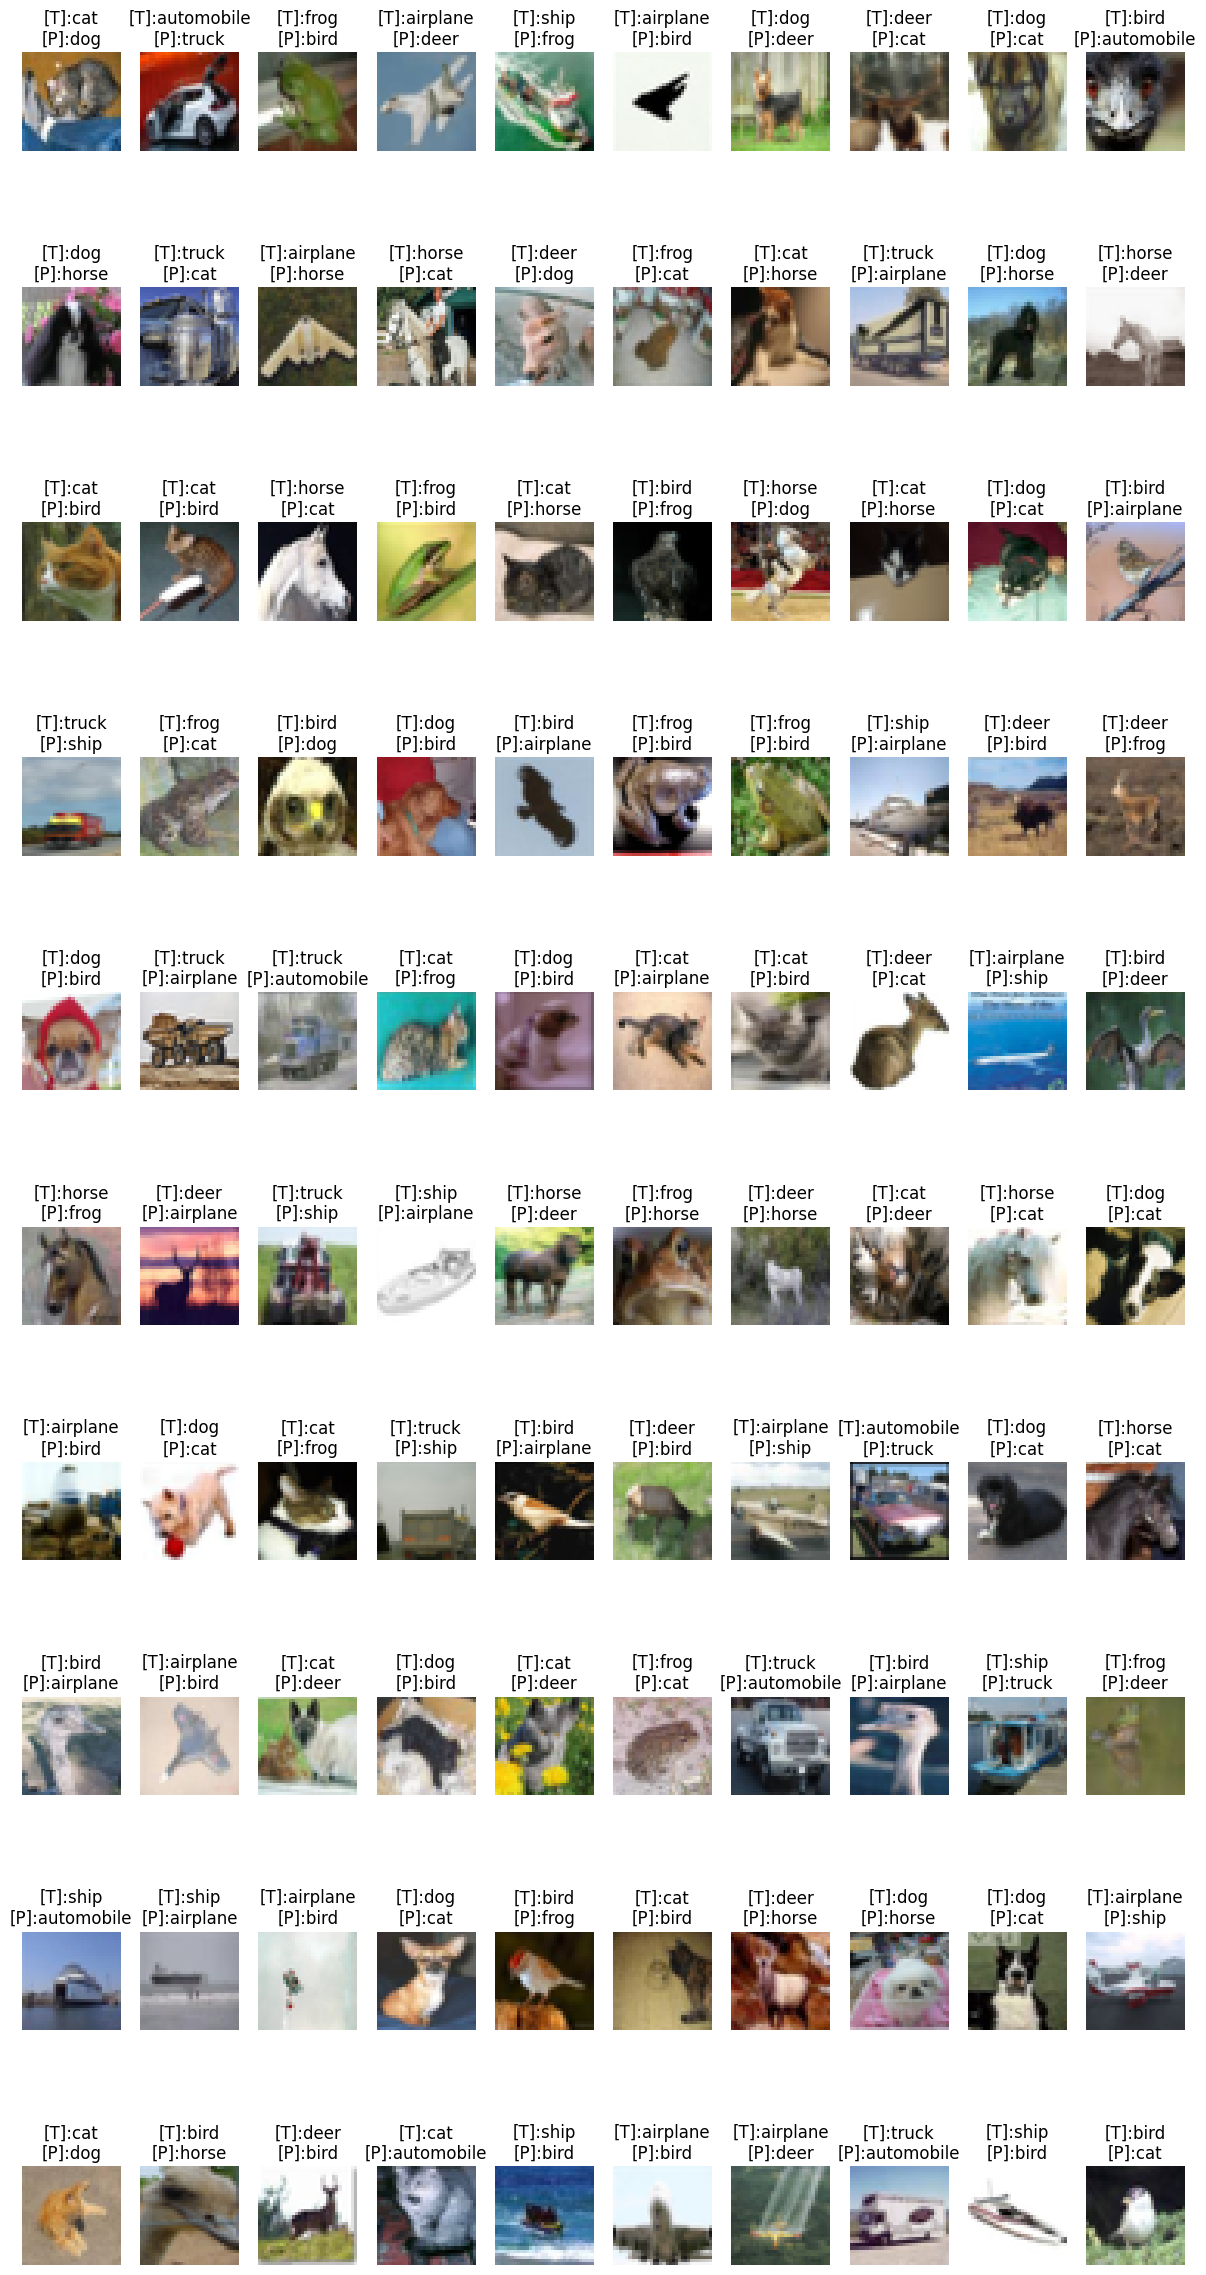

In [29]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])

1/1 [==============================] - 0s 19ms/step
airplane 的機率是: 0.0004
automobile 的機率是: 0.0
bird 的機率是: 1e-04
cat 的機率是: 0.9874
deer 的機率是: 0.0003
dog 的機率是: 0.0115
frog 的機率是: 0.0
horse 的機率是: 0.0002
ship 的機率是: 0.0
truck 的機率是: 0.0
最高機率是: cat


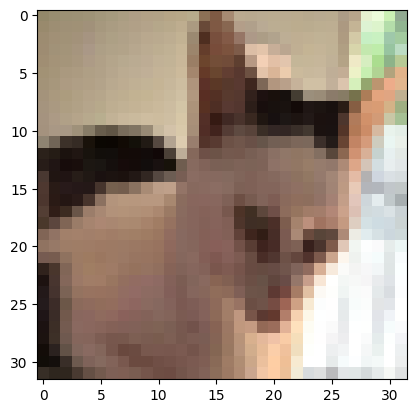

In [30]:
import requests
from PIL import Image
url = "https://pic3.zhimg.com/v2-9d0b8e3899df1a4f70f4b3f069dbb1fe_b.jpg" #@param {type:"string"}
response = requests.get(url, stream=True)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)